# Modeling
Models are specifications of a mathematical (or probabilistic) relationship between variables.

# What Is Machine Learning?
_Machine learning_, in our context, is the use of models that are _learned from data_.


# Overfitting And Underfitting
_Overfitting_ of a model is probable when the model performs well against the training data but applies poorly to any new data. _Underfitting_ of a model is probable when the model performs poorly on either training or new data.

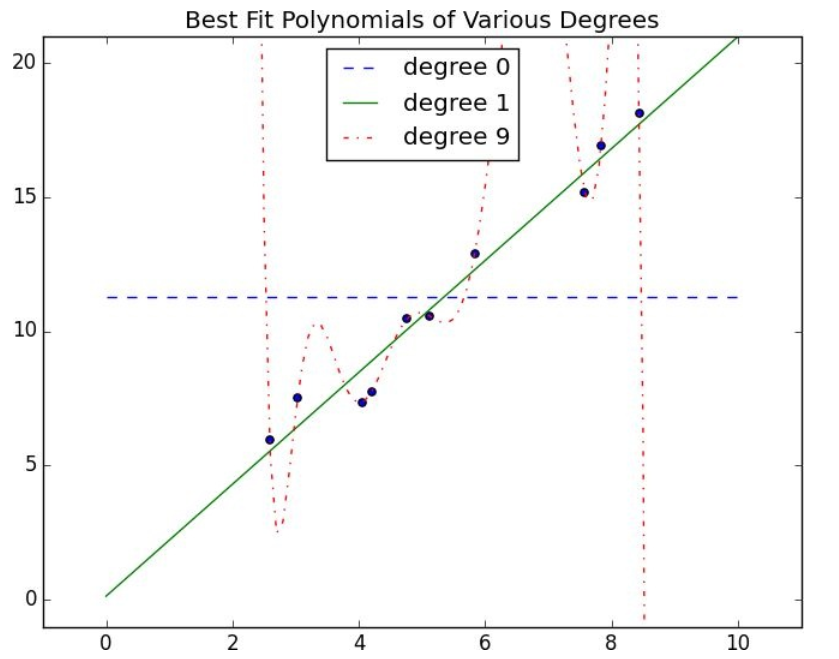

The above figure shows extreme underfitting with degree 0 and extreme overfitting with degree 9.

One way to reduce do not overfit is to split the data set into training and testing subsets:

In [1]:
def split_data(data, prob):
    """split data into fractions [prob, 1 - prob]"""
    results = [], []
    for row in data:
        results[0 if random.random() < prob else 1].append(row)
    return results

When splitting data, it's important to keep input data and target data in the same order:

In [2]:
def train_test_split(x, y, test_pct):
    data = zip(x, y) # pair corresponding values
    train, test = split_data(data, 1 - test_pct) # split the data set of pairs
    x_train, y_train = zip(*train) # magical un-zip trick
    x_test, y_test = zip(*test)
    return x_train, x_test, y_train, y_test

# Correctness
Predictions fall into one of four categories:

| True Positive | Predicted true, and it was true |
| :----------- | :--------------- |
| False Positive (Type 1 Error) | Predicted true, but it was false |
| False Negative (Type 2 Error) | Predicted false, but it was true |
| True Negative | Predicted false, and it was false |

Suppose we predicted that a person has leukemia if they are named "Luke." We can predict with 98% accuracy--but this clearly shows that accuracy is itself solely a measure of a good model:

| | leukemia | no leukemia | total |
| --- | --- | --- | --- |
| "Luke" | 70 | 4,930 | 5,000 |
| not "Luke" | 13,930 | 981,070 | 995,000 |
| total | 14,000 | 986,000 | 1,000,000 |


In [3]:
true_positives = 70
false_positives = 4930
true_negatives = 981070
false_negatives = 13930

def accuracy(tp, fp, fn, tn):
    correct = tp + tn
    total = tp + fp + fn + tn
    return correct / total

accuracy(true_positives, false_positives, false_negatives, true_negatives) # 0.98114

0.98114

_Precision_ measures the accuracy of our _positive_ predictions:

In [4]:
def precision(tp, fp, fn, tn):
    return tp / (tp + fp)

precision(true_positives, false_positives, false_negatives, true_negatives) # 0.014

0.014

_Recall_ measures the proportion of positives predicted by the model:

In [5]:
def recall(tp, fp, fn, tn):
    return tp / (tp + fn)

recall(true_positives, false_positives, false_negatives, true_negatives) # 0.005

0.005

The precision and recall scores clearly point to the inadqequacy of our model. The _F1 score_ combines precision and recall into a single new measure:

In [6]:
def f1_score(tp, fp, fn, tn):
    p = precision(tp, fp, fn, tn)
    r = recall(tp, fp, fn, tn)
    return 2 * p * r / (p + r)

f1_score(true_positives, false_positives, false_negatives, true_negatives) # 0.007

0.00736842105263158

The F1 score is the harmonic mean of precision and recall--it will be a value somewhere in between the two. Choosing a model involves finding the right tradeoff between precision and recall. Predicting "yes" too often will lead to high recall and low precision; predicting "yes" too infrequently leads to low recall and high precision.

# The Bias-Variance Trade-off

Another way to evaluate models is through analyzing bias and variance. A _biased_ model is one that has a high rate of error even after numerous training epochs. It would also have low _variance_ because it would change its predictions little from epoch to epoch. High bias and low variance usually indicate a high level of underfitting. See the "degree 0" model above for an example here.

A model that has low bias will have a low rate of error on each training run but the models created will vary greatly (high variance). This indicates overfitting. See the "degree 9" model above as an example.

Assessing a model's bias and variance can help with improvements:
- when a model has high bias, try adding more features.
- when a model has high variance, try removing features or obtaining more data.

# Feature Extraction And Selection
A _feature_ is just an input to your model.

Features are chosen based on a combination of experience and domain knowledge.